In [117]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import yfinance as yf
import glob

In [23]:
def import_files(folder):
    path = folder
    files = glob.glob(path + "/*.csv")
    data_frame = pd.DataFrame()
    content = []
    for filename in files:
        df = pd.read_csv(filename, skiprows=(0,1)).dropna().sort_values('Ticker').reset_index(drop=True)
        content.append(df)
    data_frame = pd.concat(content)
    data_frame=data_frame[['Ticker','Peso (%)','Precio','Acciones']]
    return data_frame
data=import_files('files')

In [24]:
data

,Ticker,Peso (%),Precio,Acciones
0,AC*,1.77,107.01,"11,996,909.00"
1,ALFAA,1.51,14.14,"77,753,590.00"
2,ALPEKA,0.25,17.72,"10,361,591.00"
3,ALSEA*,0.86,45.76,"13,685,387.00"
4,AMXL,13.70,15.69,"634,706,362.00"
...,...,...,...,...
31,SITES1A-1,0.75,23.86,"17,574,796.00"
32,TLEVISACPO,2.80,32.14,"48,589,308.00"
33,VESTA*,0.91,40.15,"12,604,660.00"
34,VOLARA,0.57,19.97,"15,965,532.00"


In [20]:
def ticker(datacolumn):
    #Seleccionar tickers que más se repiten
    t=datacolumn.value_counts().sort_index().loc[lambda x: x>=x.max()].index.tolist()
    #Eliminar signos extraños (no concuerdan en yfinance)
    new_tickers=[]
    strange=['*']
    for word in t:
        for letter in word:
            if letter in strange:
                word = word.replace(letter,"")   
        new_tickers.append(word)
    new_tickers[21]='LIVEPOLC-1' #editar single tickers que no coincidan
    #agregar '.MX' al final para que concuerde con yfinance
    addt=['.MX']*len(new_tickers)
    newtickers=[new_tickers[i]+addt[i] for i in range(len(new_tickers))]
    newtickers[23]='MXN=X' #editar single tickers que no coincidan
    return newtickers
tickers=ticker(data['Ticker'])

In [6]:
dates = ['2020/01/31','2020/02/28','2020/03/31','2020/04/30','2020/05/29','2020/06/30',
                    '2020/07/31','2020/08/31','2020/09/30','2020/10/30','2020/11/30','2020/12/31',
                    '2021/01/29','2021/02/26','2021/03/31','2021/04/30','2021/05/31','2021/06/30',
                    '2021/07/30','2021/08/31','2021/09/30','2021/10/26','2021/11/30','2021/12/31',
                    '2022/01/26','2022/02/28','2022/03/31','2022/04/29','2022/05/31','2022/06/30',
                    '2022/07/29']

In [7]:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = yf.download(tickers, start_date, end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

In [8]:
closing_prices=[get_adj_closes(tickers=tickers,start_date='2020-01-31',end_date='2022-08-01')]

[*********************100%***********************]  30 of 30 completed


In [9]:
closing_prices=pd.DataFrame(closing_prices[0]).dropna().reset_index()
closing_prices

,Date,AC.MX,ALFAA.MX,ALSEA.MX,AMXL.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,...,LABB.MX,LIVEPOLC-1.MX,MEGACPO.MX,MXN=X,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,TLEVISACPO.MX,WALMEX.MX
0,2020-01-31,107.120003,14.19,45.825001,15.695,363.149994,31.205000,33.805000,43.439999,7.595,...,22.350000,99.714996,70.680000,18.780800,143.755005,44.410000,197.339996,204.115005,41.965000,55.220001
1,2020-02-04,108.879997,14.18,45.849998,15.990,365.799988,31.315001,34.285000,43.349998,7.945,...,22.450001,98.184998,71.044998,18.814400,144.490005,46.755001,199.929993,204.395004,42.320000,56.625000
2,2020-02-05,107.470001,14.04,46.240002,15.890,372.700012,31.200001,33.980000,42.840000,7.750,...,22.110001,96.519997,72.879997,18.671289,144.050003,46.869999,196.190002,202.759995,40.950001,56.119999
3,2020-02-06,107.620003,13.66,46.099998,15.680,369.670013,31.129999,33.130001,43.270000,7.750,...,21.900000,93.820000,70.730003,18.587601,145.020004,46.470001,193.059998,204.080002,40.369999,55.209999
4,2020-02-07,107.610001,13.36,45.200001,15.640,366.769989,30.740000,33.169998,43.009998,7.790,...,20.959999,94.000000,71.949997,18.639700,144.059998,46.110001,193.199997,202.669998,40.029999,56.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,2022-07-25,139.020004,14.10,38.910000,19.010,382.739990,45.500000,74.239998,35.490002,8.310,...,19.370001,89.320000,48.049999,20.534599,124.489998,43.820000,189.699997,142.979996,32.240002,71.860001
626,2022-07-26,143.910004,13.59,38.290001,18.840,379.760010,45.770000,74.070000,36.000000,8.000,...,18.709999,89.160004,47.689999,20.450701,120.959999,43.470001,187.960007,142.500000,30.760000,70.760002
627,2022-07-27,140.130005,14.03,38.580002,18.770,380.459991,46.990002,73.070000,37.380001,8.030,...,19.400000,89.589996,48.200001,20.453699,120.919998,42.299999,193.059998,143.839996,31.190001,71.459999
628,2022-07-28,141.410004,14.23,39.189999,19.350,384.769989,47.590000,75.080002,37.590000,8.130,...,19.320000,91.269997,47.779999,20.373301,124.400002,43.939999,211.360001,145.199997,32.270000,73.599998


In [10]:
closing_prices.to_csv(r"C:\Users\frida\Desktop\ITESO\9NO SEMESTRE\Microestructuras de Trading\Laboratorio 1\created_files\closing_prices.csv")

In [229]:
def transpose_prices(data):
    price=pd.DataFrame(data).dropna().reset_index()
    price['Date']=price['Date'].dt.strftime('%Y/%m/%d')
    price=[price[price['Date']==dates[i]] for i in range(len(dates))]
    content = []
    for i in range(len(price)):   
        df = price[i]
        content.append(df)
    prices = pd.concat(content).reset_index(drop=True).set_index('Date')
    return prices
prices=transpose_prices(closing_prices)

In [230]:
prices=prices.T
prices=prices.drop(prices.index[[0]])
prices1=prices.T
prices

Date,2020/01/31,2020/02/28,2020/03/31,2020/04/30,2020/05/29,2020/06/30,2020/07/31,2020/08/31,2020/09/30,2020/10/30,...,2021/10/26,2021/11/30,2021/12/31,2022/01/26,2022/02/28,2022/03/31,2022/04/29,2022/05/31,2022/06/30,2022/07/29
AC.MX,107.120003,107.989998,95.610001,92.830002,98.910004,100.750000,109.760002,99.830002,95.769997,92.349998,...,125.160004,130.770004,130.520004,123.610001,135.119995,135.250000,129.490005,133.789993,132.500000,141.210007
ALFAA.MX,14.190000,12.570000,6.400000,9.860000,11.740000,12.950000,12.040000,14.070000,13.710000,14.170000,...,15.400000,15.330000,15.020000,14.580000,15.340000,15.110000,13.670000,15.120000,14.280000,14.010000
ALSEA.MX,45.825001,39.919998,15.180000,19.870001,18.750000,22.610001,21.660000,22.629999,21.080000,18.250000,...,45.430000,36.689999,37.950001,40.790001,44.360001,49.860001,44.730000,42.150002,38.080002,39.660000
AMXL.MX,15.695000,15.520000,14.050000,14.600000,14.810000,14.750000,13.990000,13.290000,13.880000,12.910000,...,18.000000,18.809999,21.690001,19.809999,18.510000,21.120001,19.860001,20.809999,20.549999,19.400000
ASURB.MX,363.149994,324.890015,223.360001,241.389999,228.550003,256.649994,221.199997,247.979996,256.790009,245.020004,...,393.320007,392.829987,422.760010,402.649994,442.910004,443.929993,445.369995,429.950012,395.230011,384.000000
BBAJIOO.MX,31.205000,30.700001,20.480000,19.000000,20.219999,19.540001,17.129999,17.500000,16.559999,17.540001,...,40.459999,36.029999,36.799999,37.480000,49.750000,54.610001,50.389999,48.549999,40.310001,47.939999
BIMBOA.MX,33.805000,29.690001,34.480000,35.590000,34.669998,38.470001,40.090000,40.419998,41.369999,40.990002,...,57.439999,56.220001,62.970001,62.389999,63.070000,60.060001,62.900002,64.720001,65.370003,72.040001
BOLSAA.MX,43.439999,41.580002,36.240002,43.779999,42.490002,43.020000,44.919998,46.099998,50.110001,43.119999,...,40.639999,36.160000,38.919998,34.869999,39.220001,42.060001,40.430000,36.250000,35.689999,37.939999
CEMEXCPO.MX,7.595000,6.340000,4.930000,5.070000,5.250000,6.480000,6.820000,7.020000,8.380000,8.760000,...,13.870000,13.300000,13.990000,12.530000,10.520000,10.690000,8.980000,9.260000,7.830000,8.230000
CUERVO.MX,34.900002,29.969999,28.990000,36.970001,38.400002,44.259998,44.590000,41.810001,45.130001,44.529999,...,44.040001,49.110001,51.360001,47.790001,51.360001,48.950001,50.869999,44.330002,43.500000,46.139999


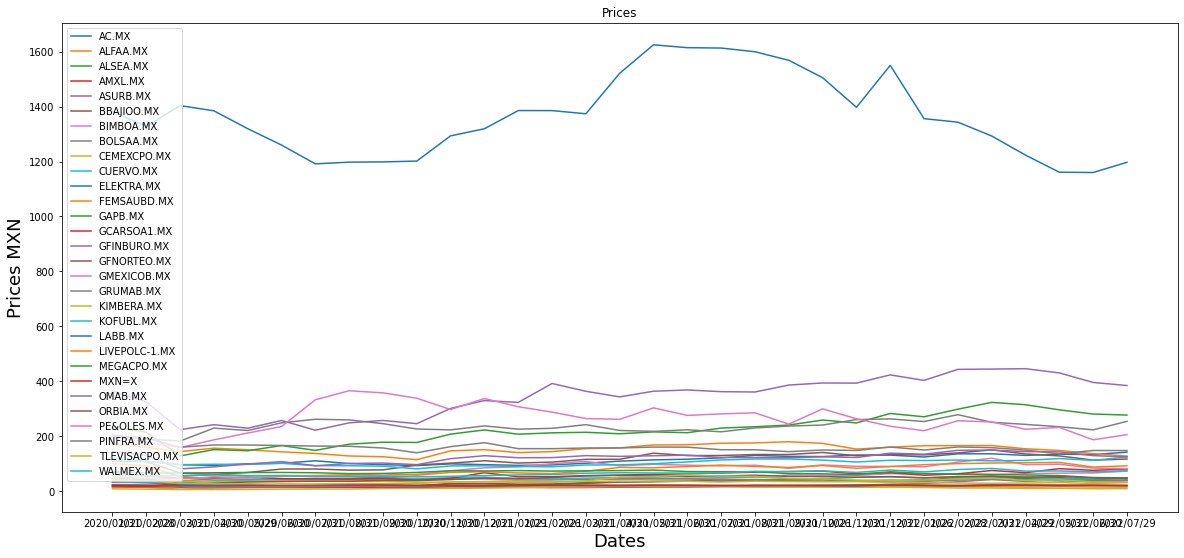

In [235]:
def prices_timeseries(data):
    plt.figure(figsize=(20,9)) 
    for i in data.columns.values:
        plt.plot( data[i],  label=i)
    plt.title('Prices')
    plt.xlabel('Dates',fontsize=18)
    plt.ylabel('Prices MXN',fontsize=18)
    plt.legend(data.columns.values, loc='best')
    plt.show()
prices_timeseries(prices1)

In [293]:
k=1000000
com= 0.00125
def postura_inicial(data):
    j20=data.iloc[0:36,0:2]
    t=data['Ticker'].value_counts().sort_index().loc[lambda x: x>=x.max()].index.tolist()
    j20=j20[j20.Ticker.isin(t)].reset_index(drop=True)
    for i in range(len(tickers)):
        j20.iloc[i,0]=tickers[i]
    j20['Precio']=prices.iloc[:,0].values
    j20['Postura']=j20['Peso (%)']/100*k
    j20['Titulos']=round(j20['Postura']/j20['Precio'])
    j20['Postura']=(j20['Peso (%)']/100*k)-(j20['Titulos']*j20['Precio']*com)    #considerando comisiones
    cash=(100-(pin['Peso (%)'].values.sum()))*k
    return j20

In [294]:
pin=postura_inicial(data)
pin

,Ticker,Peso (%),Precio,Postura,Titulos
0,AC.MX,1.77,107.120003,17677.906499,165.0
1,ALFAA.MX,1.51,14.190000,15081.127301,1064.0
2,ALSEA.MX,0.86,45.825001,8589.231125,188.0
3,AMXL.MX,13.70,15.695000,136828.747935,8729.0
4,ASURB.MX,2.75,363.149994,27465.500751,76.0
5,BBAJIOO.MX,0.83,31.205000,8289.624338,266.0
6,BIMBOA.MX,1.87,33.805000,18676.632294,553.0
7,BOLSAA.MX,0.72,43.439999,7190.986200,166.0
8,CEMEXCPO.MX,4.30,7.595000,42946.246389,5662.0
9,CUERVO.MX,0.67,34.900002,6691.624000,192.0


In [312]:
cash=((100-pin['Peso (%)'].values.sum())/100)*k
cash

43900.000000000146

In [266]:
def pasiva_results(yfprices,posturainicial):
    pasiva=pd.DataFrame(columns=['timestamp','capital','rend','rend_acum'])
    post=yfprices.mul(posturainicial.iloc[:,4].values, axis = 0) 
    for i in range(len(dates)):
        pasiva['timestamp']=dates
        pasiva.iloc[i,1]=post.iloc[:,i].sum()
    pasiva['rend']=pasiva['capital'].pct_change().fillna((pasiva.iloc[0,1]-k)/pasiva.iloc[0,1])
    pasiva['rend_acum']=pasiva['rend'].cumsum()  
    return pasiva

In [272]:
pasiva=pasiva_results(prices,pin)
pasivaplot=pasiva.set_index('timestamp')
pasiva

,timestamp,capital,rend,rend_acum
0,2020/01/31,1.00039e+06,0.000392,0.000392
1,2020/02/28,940728,-0.059641,-0.059249
2,2020/03/31,811177,-0.137714,-0.196963
3,2020/04/30,854796,0.053773,-0.143190
4,2020/05/29,846482,-0.009726,-0.152916
5,2020/06/30,882245,0.042248,-0.110668
6,2020/07/31,865939,-0.018482,-0.129150
7,2020/08/31,862474,-0.004001,-0.133151
8,2020/09/30,877113,0.016973,-0.116178
9,2020/10/30,863098,-0.015978,-0.132156


In [277]:
def final_plot(dataframe):
    dataframe.plot(kind = 'bar',
                 width=0.8,
                 subplots=True,
                 figsize=(10,20),
                   color=["#FF9B85","#60D394","#AAF683"]);

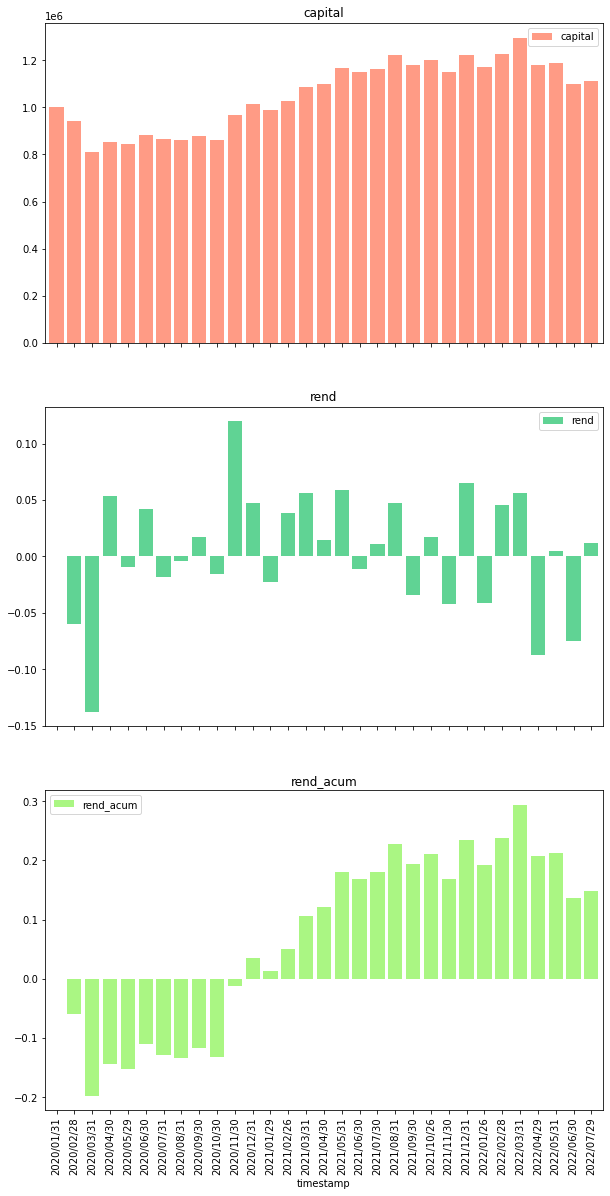

In [279]:
final_plot(pasivaplot)